# Karatsuba Algorithm for Multiplication:

The Algorithm for calculating the product of two n-digit numbers is as follows: 
- Divide the two numbers x, y in two halves a,b and c,d each respectively,  so that 
\begin{equation*} x = a*10^{n/2} + b \end{equation*} and \begin{equation*} y=c*10^{n/2} + d \end{equation*}, where $n$ is number of digits in x or y (assuming they are equal sized),  or _(image source: Stanford.edu)_: 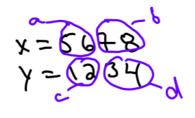 

- **Step 1**: Compute $p1 = a*c$
- **Step 2**: Compute $p2 = b*d $
- **Step 3**: Compute $p3 = (a+b)(c+d)$
- **Step 4**: Compute $p4 = p3-p2-p1$
- **Step 5**: Compute \begin{equation*}product(x,y) =  p1 * 10^{n} + p4 * 10^{n/2} + p2 \end{equation*}

## 1. Recursive algorithm:

The products p1, p2, and p3 can be computed recursively using Karatsuba algorithm. This implies that the algorithm is called till we have single digit numbers which can be multiplied directly. 

## 2. Generalizaion:

### 2.1 Odd number of digits:
In case x and y have odd number of digits, we compute step 1 to 4 as usual. The split of number will be unequal but that will not impact the algorithm. Only part that changes is step 5 which is now calculated as: \begin{equation*}product(x,y) =  p1 * 10^{n+mod(n,2)} + p4 * 10^{(n+mod(n,2))/2} + p2 \end{equation*}

### 2.2 Unequal digits in x and y
In case of unequal number of digits in x and y, pad the smaller number by zeros so that they have same number of digits. Divide the result by $10^p$ where $p$ is number zeros being padded.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
def num2digit(x):
    # Converts the integer to array of digits
    return [int(i) for i in str(x)]

In [15]:
def digit2num(lst):
    # Converts the array of digits to integer
    no =0
    for i in range(len(lst)):
        no += lst[i]*10**((len(lst))-i-1)
    return no

In [19]:
# Test
x =12345
lst= num2digit(x)
print(lst)
x1 = digit2num(lst)
print(x1)

[1, 2, 3, 4, 5]
12345


In [1]:
def split_array(lst):
    # Splits the array lst in two halves a,b 
    n = len(lst)
    a = lst[0:int(n//2)]
    b = lst[int(n//2)::]
    return a,b
    

In [2]:
# Test
lst = [1,2,3,4]
a,b = split_array(lst)
print(a,b)

[1, 2] [3, 4]


In [10]:
def Karatsuba(x,y):
    #Non-recursive version
    
    #turn integers into digits
    lst_x = num2digit(x)
    lst_y = num2digit(y)
    n =max(len(lst_x),len(lst_y))
    
    # For unequl length of multiples, pad the list with 
    # zeros and divide the result bt power of 10 in the end
    div =1
    if len(lst_x) < len(lst_y):
        div = 10**(len(lst_y)-len(lst_x))
        lst_x = (lst_x +[0]*(len(lst_y)-len(lst_x)))
        
    elif len(lst_y)< len(lst_x):
        div = 10**(len(lst_x)-len(lst_y))
        lst_y = (lst_y +[0]*(len(lst_x)-len(lst_y)))
        
    
    # Divide in two halves
    a,b =  split_array(lst_x)
    c,d = split_array(lst_y)
    
    # Change back to integers from array
    a = digit2num(a)
    b = digit2num(b)
    c = digit2num(c)
    d = digit2num(d)
    

    # Calculate the terms
    p1 = a*c
    p2 = b*d
    p3 = (a+b)*(c+d)
    p4 = p3-p2-p1
    
    # The modulus function in result ensure it works for odd number of digits.
    return int(((p1*(10**(n+(n%2))))+ (p4*(10**((n+(n%2))//2))) +p2)/div)


In [18]:
Karatsuba(13,345)

4485

In [59]:
def Karatsuba_recursive(x,y):
    #Non-recursive version
    
    #turn integers into digits
    lst_x = num2digit(x)
    lst_y = num2digit(y)
    n =max(len(lst_x),len(lst_y))
    
    # Base case
    if n == 1:
        return x*y
    
    else:
        
        # for unequal numbers of length: workout later
        div =1
        if len(lst_x) < len(lst_y):
            div = 10**(len(lst_y)-len(lst_x))
            lst_x = (lst_x +[0]*(len(lst_y)-len(lst_x)))

        elif len(lst_y)< len(lst_x):
            div = 10**(len(lst_x)-len(lst_y))
            lst_y = (lst_y +[0]*(len(lst_x)-len(lst_y)))


        # Divide in two halves
        a,b =  split_array(lst_x)
        c,d = split_array(lst_y)
        
        # Change back to integers from array
        a = digit2num(a)
        b = digit2num(b)
        c = digit2num(c)
        d = digit2num(d)
        
        # Calculate the terms using recursion
        p1 = Karatsuba_recursive(a,c)
        p2 = Karatsuba_recursive(b,d)
        p3 = Karatsuba_recursive((a+b),(c+d))
        p4 = p3-p2-p1
        return int(((p1*(10**(n+(n%2))))+ (p4*(10**((n+(n%2))//2))) +p2)/div)


In [60]:
Karatsuba_recursive(1234,5678)

7006652

In [65]:
from nose.tools import assert_equal

class test_karatsuba(object):
    def test_k(self,sol):
        assert_equal(sol(1234,5678),7006652) # example with 2^n digits
        assert_equal(sol(128, 909),116352)   # example with odd number of digits
        assert_equal(sol(56, 358),20048)     # example with unequal number of digits
        assert_equal(sol(273916949, 476082), 130406928913818)     # example with large number of digits

        print('All tests passed')

t1 = test_karatsuba()
t1.test_k(Karatsuba)

t2 = test_karatsuba()
t2.test_k(Karatsuba_recursive)

All tests passed
All tests passed
